# 0. Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")     
import seaborn as sns
from collections import Counter

In [13]:
! pip install lightgbm

# 1. Load and Check Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/latika24/ME-793-Prediction-of-Fatigue-Strength/main/data.csv')

In [4]:
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [ ]:
features=df.columns.drop('Sl. No.')

In [ ]:
df.shape

(437, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl. No.,437.0,219.000000,126.295289,1.000,110.000,219.000,328.000,437.000
NT,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
THT,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
THt,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
THQCr,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
CT,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Ct,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
DT,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Dt,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
QmT,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000


## Variable Description
C % - Carbon

Si % - Silicon

Mn % - Manganese

P % - Phosphorus

S % - Sulphur

Ni % - Nickel

Cr % - Chromium

Cu % - Copper

Mo % - Molybdenum

NT - Normalizing Temperature

THT - Through Hardening Temperature

THt - Through Hardening Time

THQCr - Cooling Rate for Through Hardening

CT - Carburization Temperature

Ct - Carburization Time

DT - Diffusion Temperature

Dt - Diffusion time

QmT - Quenching Media Temperature (for Carburization)

TT - Tempering Temperature

Tt - Tempering Time

TCr - Cooling Rate for Tempering

RedRatio - Reduction Ratio (Ingot to Bar)

dA - Area Proportion of Inclusions Deformed by Plastic Work

dB -Area Proportion of Inclusions Occurring in Discontinuous Array

dC -Area Proportion of Isolated Inclusions

Fatigue - Rotating Bending Fatigue Strength (107 Cycles)

# 2. Visualization

## Correlation

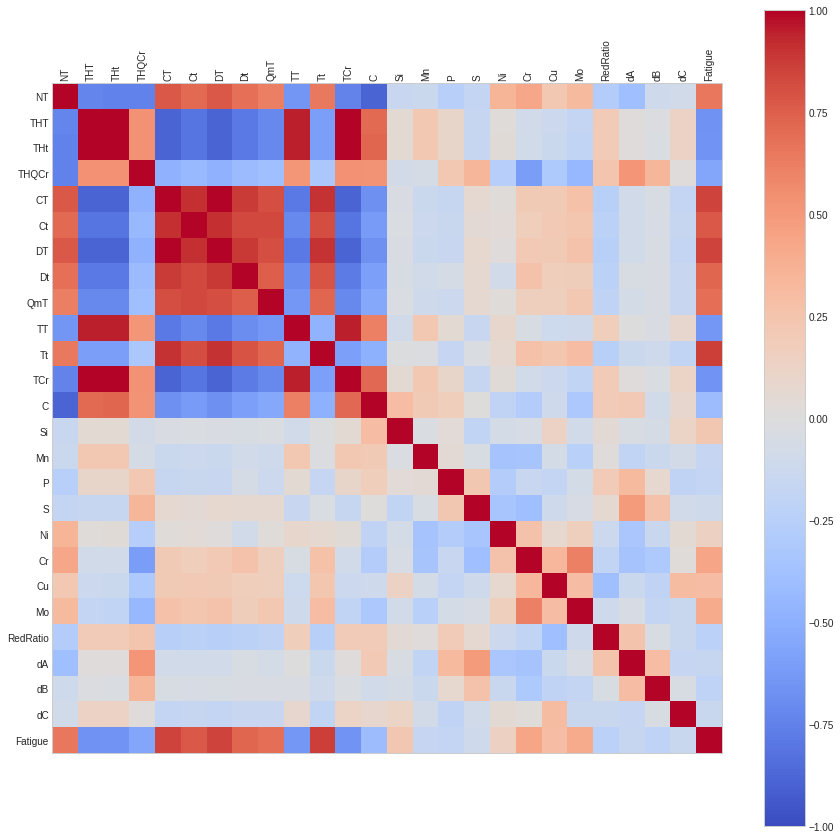

In [ ]:
df2 = df
df2.drop(['Sl. No.'],axis=1,inplace=True)
corr = df2.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
ax.grid()
fig.savefig('corr_heat_map.png')

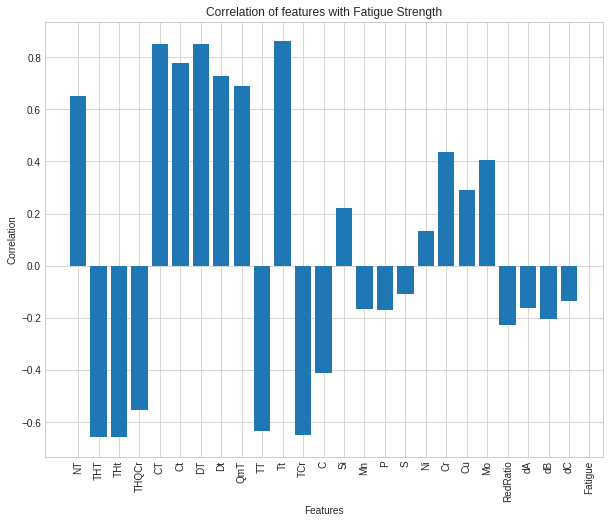

In [ ]:
correlation = df[df.columns[:]].corr()['Fatigue'][:]
plt.bar(df.columns[:-1], correlation[:-1])
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Correlation of features with Fatigue Strength')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(features, rotation='vertical')
plt.savefig('Correlation_Fatigue.png')


In [ ]:
%matplotlib inline

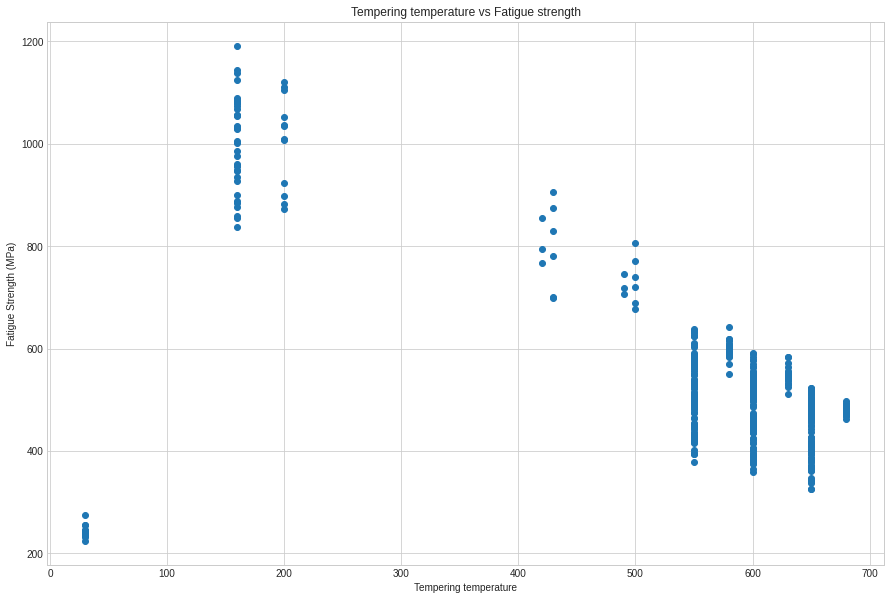

In [ ]:
plt.scatter(df['TT'], df['Fatigue'])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title('Tempering temperature vs Fatigue strength')
plt.xlabel('Tempering temperature')
plt.ylabel('Fatigue Strength (MPa)')
plt.savefig('TTvsFatigueStrength.png')

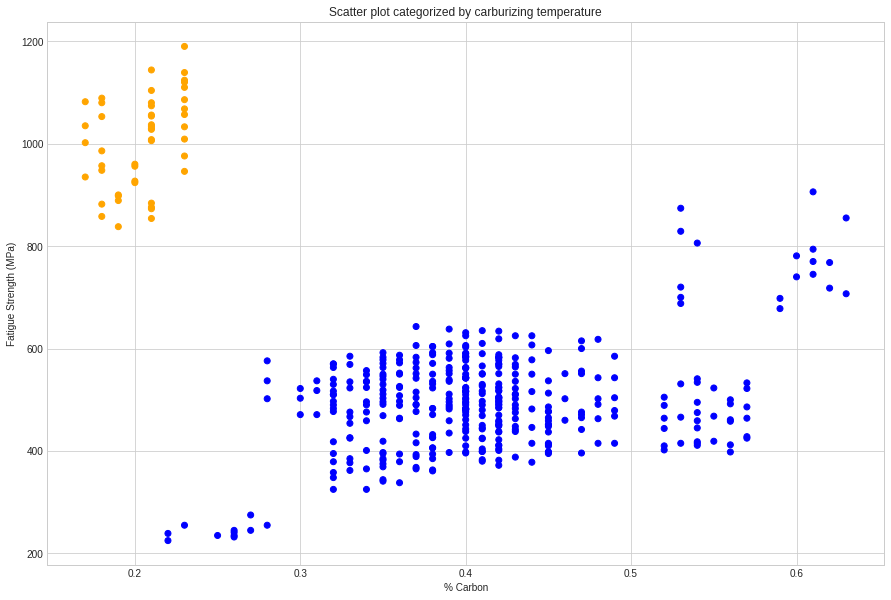

In [ ]:
label = df['CT']
color= ['blue' if l == 30 else 'orange' for l in label]
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.scatter(df['C'], df['Fatigue'], color=color)
plt.title('Scatter plot categorized by carburizing temperature')
plt.xlabel('% Carbon')
plt.ylabel('Fatigue Strength (MPa)')
plt.savefig('CarbonvsFatigueStrength.png')

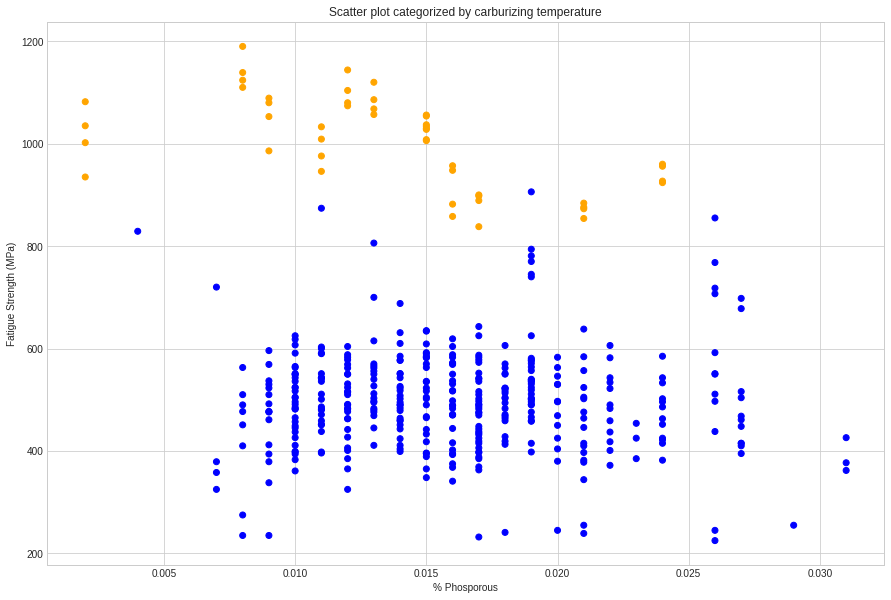

In [ ]:
label = df['CT']
color= ['blue' if l == 30 else 'orange' for l in label]
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.scatter(df['P'], df['Fatigue'], color = color)
plt.title('Scatter plot categorized by carburizing temperature')
plt.xlabel('% Phosporous')
plt.ylabel('Fatigue Strength (MPa)')
plt.savefig('PhosporousvsFatigueStrength.png')

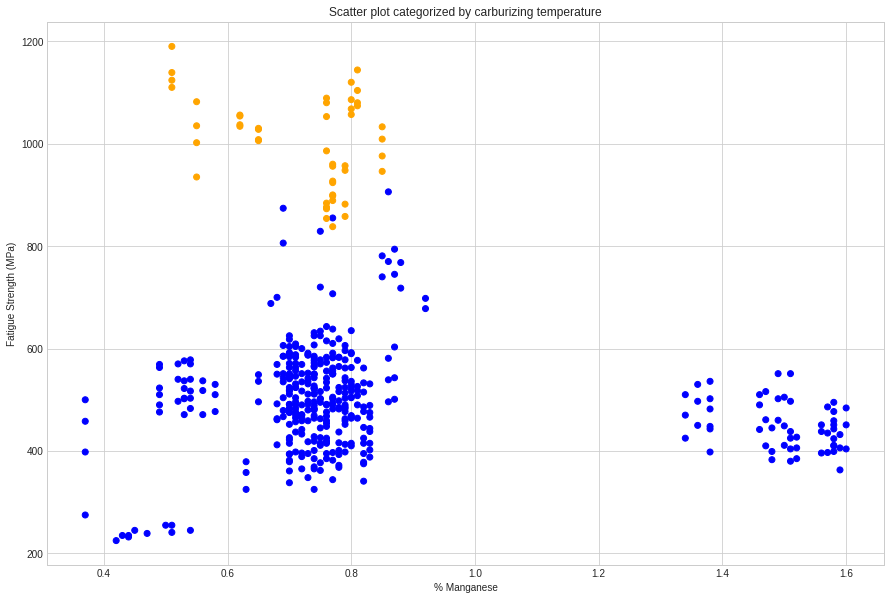

In [ ]:
label = df['CT']
color= ['blue' if l == 30 else 'orange' for l in label]
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.scatter(df['Mn'], df['Fatigue'], color = color)
plt.title('Scatter plot categorized by carburizing temperature')
plt.xlabel('% Manganese')
plt.ylabel('Fatigue Strength (MPa)')
plt.savefig('ManganesevsFatigueStrength.png')

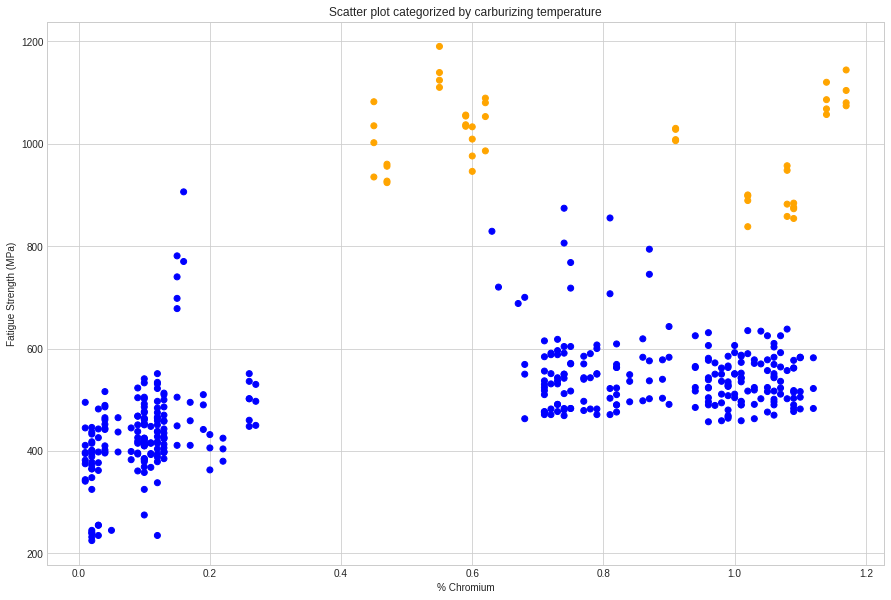

In [ ]:
label = df['CT']
color= ['blue' if l == 30 else 'orange' for l in label]
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.scatter(df['Cr'], df['Fatigue'], color = color)
plt.title('Scatter plot categorized by carburizing temperature')
plt.xlabel('% Chromium')
plt.ylabel('Fatigue Strength (MPa)')
plt.savefig('ChromiumvsFatigueStrength.png')

## Cluster Visualisation

# 2. Feature Selection

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from matplotlib import pyplot as plt

features =  [ 'NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo',
       'RedRatio', 'dA', 'dB', 'dC']
# Separating out the features
X = df.loc[:, features].to_numpy()
# Separating out the target
y = df.loc[:,['Fatigue']].to_numpy().ravel()
print(y.shape)



## Normalisation
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)



(437,)


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df['Fatigue']], axis = 1)

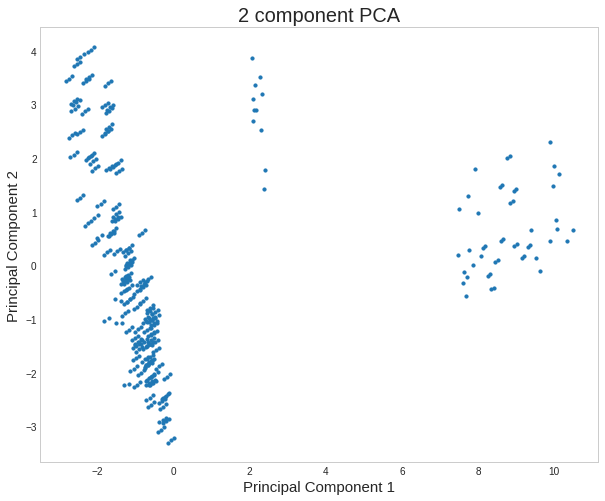

In [7]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

indicesToKeep = range(0,df.shape[0])
ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 10)
ax.grid()
fig.savefig('PCA.png')

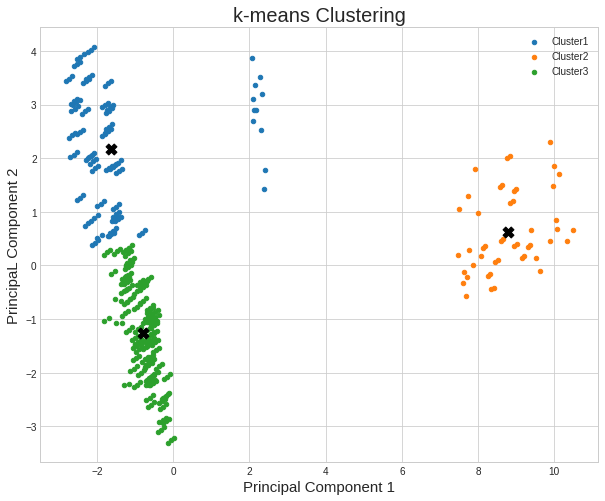

In [8]:

from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalComponents)
 

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i,s=20)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 120, color = 'k',marker='X')

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('k-means Clustering',fontSize=20)
plt.xlabel('Principal Component 1',fontSize=15)
plt.ylabel('PrincipaL Component 2',fontSize=15)

plt.legend(['Cluster1','Cluster2','Cluster3'])
plt.savefig('k-means.png')

Feature 1: 0.851458
Feature 2: 0.609111
Feature 3: 0.372955
Feature 4: 0.594318
Feature 5: 0.321589
Feature 6: 0.334306
Feature 7: 0.338483
Feature 8: 0.322709
Feature 9: 0.316100
Feature 10: 0.986458
Feature 11: 0.435433
Feature 12: 0.440101
Feature 13: 0.516048
Feature 14: 0.108359
Feature 15: 0.282483
Feature 16: 0.101777
Feature 17: 0.111047
Feature 18: 0.303382
Feature 19: 0.638762
Feature 20: 0.186931
Feature 21: 0.424176
Feature 22: 0.265073
Feature 23: 0.254467
Feature 24: 0.161214
Feature 25: 0.049246


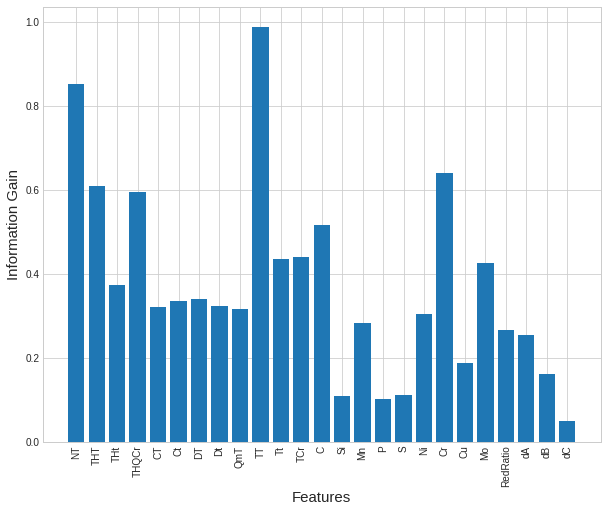

In [9]:

## Feature Selection

# Information Gain
fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
fs.fit(X, y)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i+1, fs.scores_[i]))
 
# plot the scores
plt.bar(features, fs.scores_)
plt.xticks(features, rotation='vertical')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlabel('Features',fontSize=15)
plt.ylabel('Information Gain',fontSize=15)
plt.savefig('Information_Gain.png')
 

In [10]:
# Selecting 21 best features

fs = SelectKBest(score_func=mutual_info_regression, k=21)
	# learn relationship from training data
fs.fit(X, y)
X = fs.transform(X)
print(X.shape)

(437, 21)


# 3. Modelling

In [1]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor

### Linear regression

In [ ]:
# LOOCV Implementation
cv = LeaveOneOut()

# Enumerate splits
y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
	# Split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	# Fit model
	model = LinearRegression()
	model.fit(X_train, y_train)
 
	# Evaluate model
	yhat = model.predict(X_test)
 
	# Store pred & labels
	y_true.append(y_test[0])
	y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate RMSE of model using LOOCV
RMSE = np.sqrt(np.mean((y_true-y_pred)**2))
print('RMSE: %.3f' % RMSE)

RMSE: 35.691


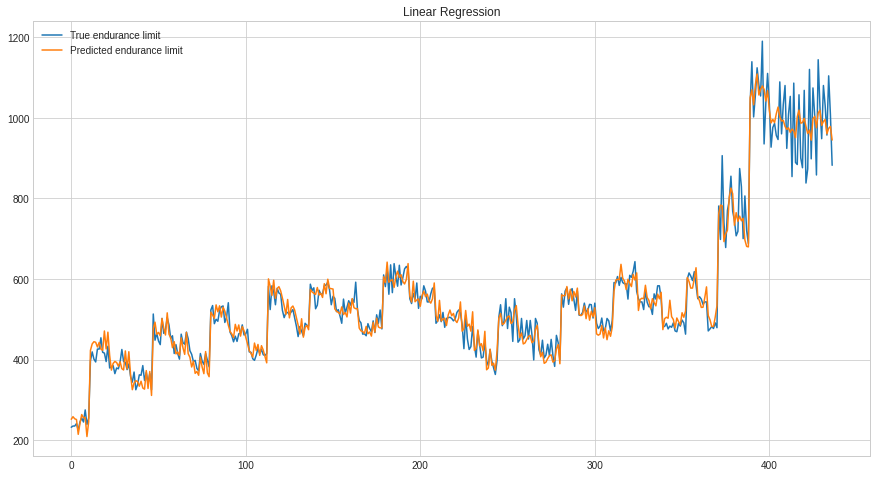

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["True endurance limit","Predicted endurance limit"])
plt.title("Linear Regression")
plt.savefig('Linear_regression.png')

### Decision Tree regression

In [ ]:
# LOOCV Implementation
cv = LeaveOneOut()

# Enumerate splits
y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
	# Split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	# Fit model
	model = DecisionTreeRegressor(random_state=0)
	model.fit(X_train, y_train)
 
	# Evaluate model
	yhat = model.predict(X_test)
 
	# Store pred & labels
	y_true.append(y_test[0])
	y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate RMSE of model using LOOCV
RMSE = np.sqrt(np.mean((y_true-y_pred)**2))
print('RMSE: %.3f' % RMSE)

RMSE: 37.892


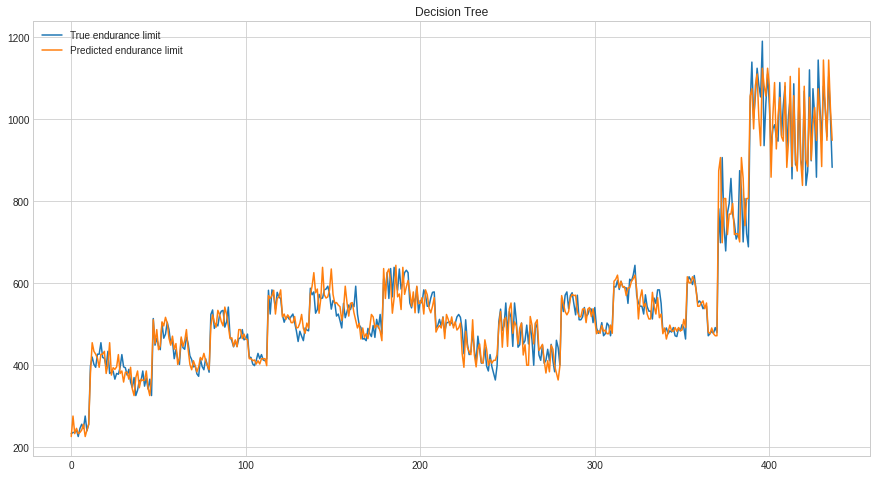

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["True endurance limit","Predicted endurance limit"])
plt.title("Decision Tree")
plt.savefig('DecisionTree_regression.png')

### Random forest regression

In [15]:
# LOOCV Implementation
cv = LeaveOneOut()

# Enumerate splits
y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
	# Split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	# Fit model
	model = RandomForestRegressor(random_state=0)
	model.fit(X_train, y_train)
 
	# Evaluate model
	yhat = model.predict(X_test)
 
	# Store pred & labels
	y_true.append(y_test[0])
	y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate RMSE of model using LOOCV
RMSE = np.sqrt(np.mean((y_true-y_pred)**2))
print('RMSE: %.3f' % RMSE)

RMSE: 27.142


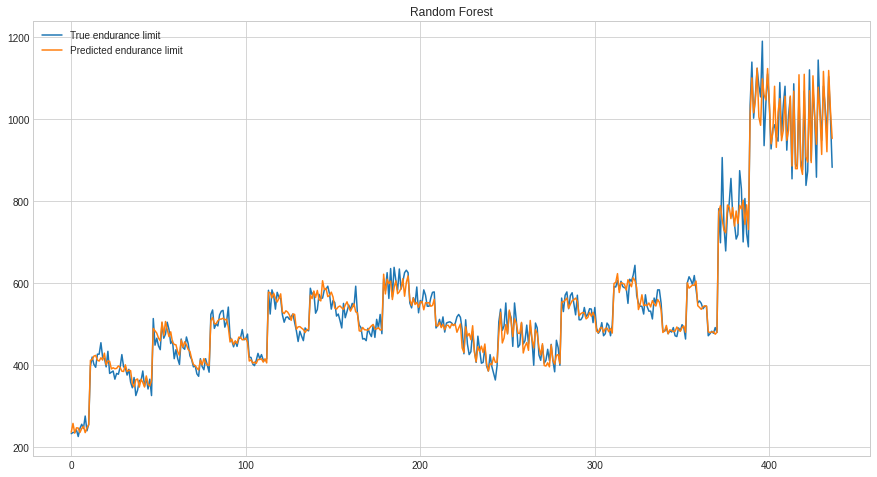

In [16]:
plt.figure(figsize=(15,8))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["True endurance limit","Predicted endurance limit"])
plt.title("Random Forest")
plt.savefig('RandomForest_regression.png')

### K Nearest Neighbors

In [ ]:
# LOOCV Implementation
cv = LeaveOneOut()

# Enumerate splits
y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
	# Split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	# Fit model
	model = KNeighborsClassifier(n_neighbors=1)
	model.fit(X_train, y_train)
 
	# Evaluate model
	yhat = model.predict(X_test)
 
	# Store pred & labels
	y_true.append(y_test[0])
	y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate RMSE of model using LOOCV
RMSE = np.sqrt(np.mean((y_true-y_pred)**2))
print('RMSE: %.3f' % RMSE)

RMSE: 52.296


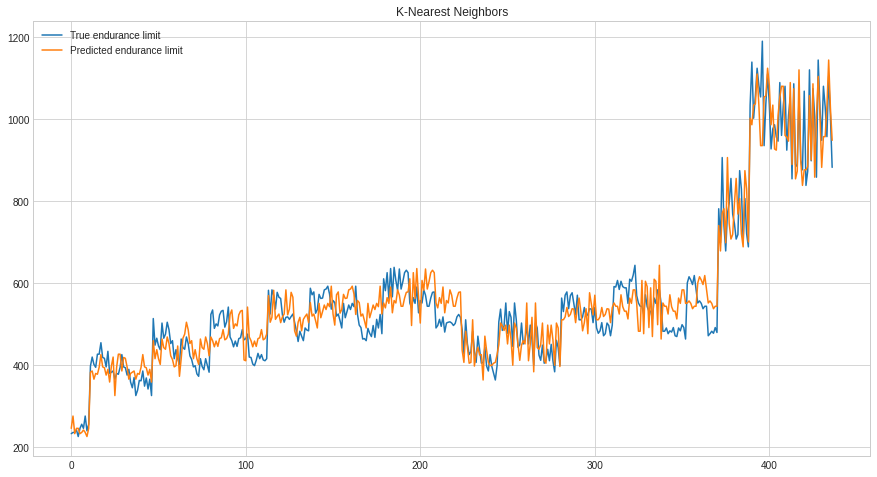

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["True endurance limit","Predicted endurance limit"])
plt.title("K-Nearest Neighbors")
plt.savefig('KNN_regression.png')

### Light GBM

In [ ]:
# LOOCV Implementation
cv = LeaveOneOut()

# Enumerate splits
y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
	# Split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	# Fit model
	model = LGBMRegressor()
	model.fit(X_train, y_train)
 
	# Evaluate model
	yhat = model.predict(X_test)
 
	# Store pred & labels
	y_true.append(y_test[0])
	y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate RMSE of model using LOOCV
RMSE = np.sqrt(np.mean((y_true-y_pred)**2))
print('RMSE: %.3f' % RMSE)

RMSE: 25.926


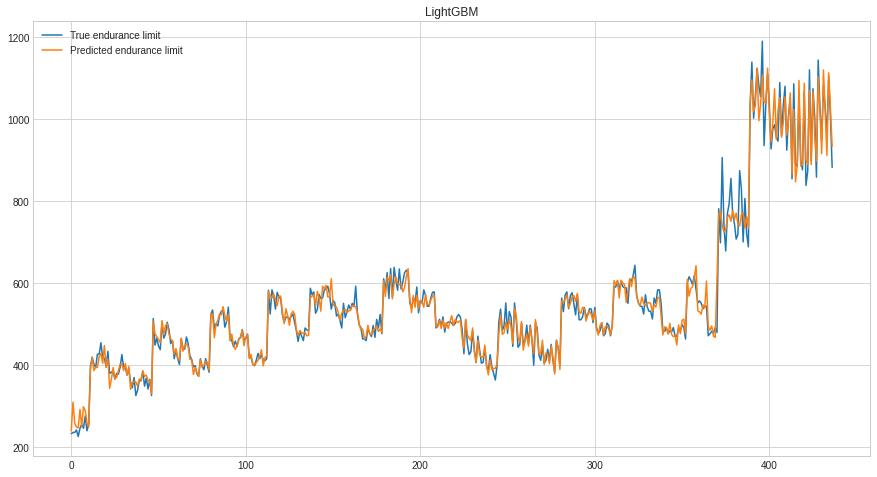

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["True endurance limit","Predicted endurance limit"])
plt.title("LightGBM")
plt.savefig('LightGBM_regression.png')

### SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
# LOOCV Implementation
cv = LeaveOneOut()

# Enumerate splits
y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
	# Split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	# Fit model
	model = SVR(kernel='linear')
	model.fit(X_train, y_train)
 
	# Evaluate model
	yhat = model.predict(X_test)
 
	# Store pred & labels
	y_true.append(y_test[0])
	y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate RMSE of model using LOOCV
RMSE = np.sqrt(np.mean((y_true-y_pred)**2))
print('RMSE: %.3f' % RMSE)

RMSE: 64.312


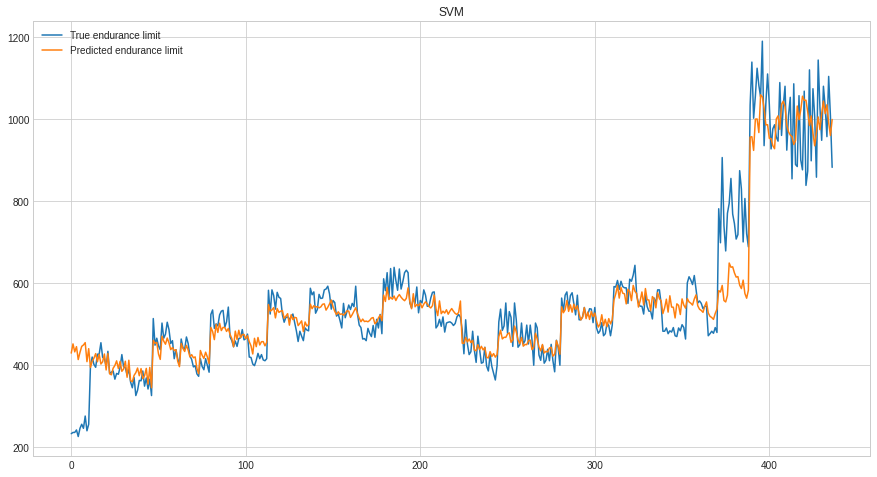

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["True endurance limit","Predicted endurance limit"])
plt.title("SVM")
plt.savefig('SVM.png')

### Neural Networks

In [11]:
# LOOCV Implementation
cv = LeaveOneOut()

# Enumerate splits
y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
	# Split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	# Fit model
	model =MLPRegressor(hidden_layer_sizes=(35,35),activation="relu" ,random_state=1, max_iter=2000)
	model.fit(X_train, y_train)
 
	# Evaluate model
	yhat = model.predict(X_test)
 
	# Store pred & labels
	y_true.append(y_test[0])
	y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate RMSE of model using LOOCV
RMSE = np.sqrt(np.mean((y_true-y_pred)**2))
print('RMSE: %.3f' % RMSE)

RMSE: 29.038


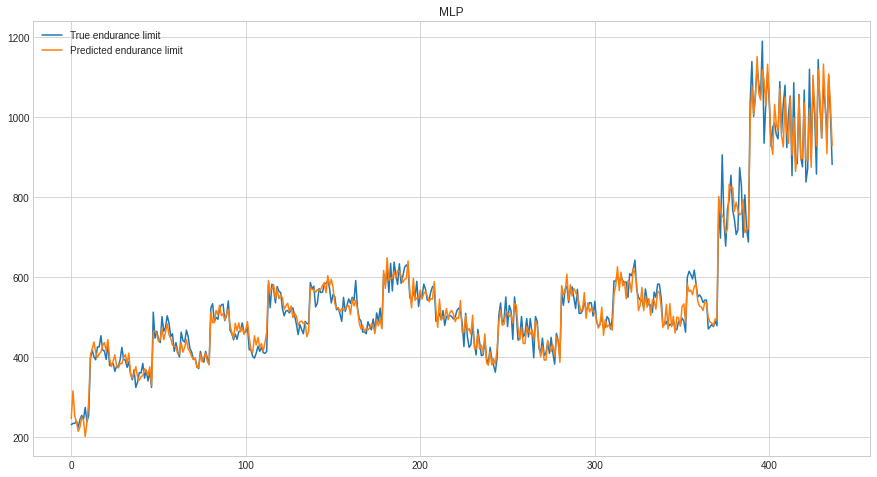

In [14]:
plt.figure(figsize=(15,8))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["True endurance limit","Predicted endurance limit"])
plt.title("MLP")
plt.savefig('MLP.png')